# 第6回 推定と検定

[![open in colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/slt666666/biostatistics_text_wed/blob/main/source/_static/colab_notebook/chapter6.ipynb)

※Web上ではテーブルや記号など一部LaTeXが反映されず見にくくなってしまっていますが、Google Colabだとちゃんと見えます。

## はじめに

ある母集団の特徴を知りたいときに、集団全体のデータからではなく、一部の標本データから母集団の特徴(母数など)を推測することが推測統計学の1つの目的でした。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter5/sampling2.png?raw=true" alt="title" height="250px">

今回はこの母集団の特徴を知る「推定」や「検定」を扱います。また、推定・検定を行うために重要となってくる標本分布についてもより詳しく見ていきます。

## 正規分布からの標本

生物学では多くの母集団の分布を正規分布とみなす場合が多いです。

また、正規分布だと仮定した場合、理論や応用が非常にスムーズであることがよく知られており、多くの推定手法や検定手法が正規分布に基づいて構築されています。

そこで、まず正規分布の母集団から抽出した標本の**標本分布**についてより詳しく見ていきます。

### 正規分布の性質

前回学習した通り、確率変数$X$が正規分布に従うとき、その密度関数は

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\lbrace-\frac{(x-\mu)^2}{2\sigma^2}\rbrace}$

で、その平均値(期待値)、分散は$E(X) = \mu$,    $V(X) = \sigma^2$となります。

つまり、正規分布の形は平均$\mu$と分散$\sigma^2$の2つのパラメータ(**母数**)で決まります。

正規分布は実用上非常に重要な分布で、統計分析を行う際には正規分布を仮定することが非常に多いです。

その理由としては、

* 草丈の分布や実験誤差の分布など、生物学において分析対象となる現象は正規分布で表せるものが多い。
* 標本平均などの多くの統計量は、確率変数の和の形になっているものが多い。このような統計量は中心極限定理により正規分布として近似することができる。

といった点が挙げられます。ほかにも、変数の変換や数学的な扱いが容易である点等、様々な扱いやすい特徴を持っています。


では続いて、正規分布している母集団から標本を抽出し、そこから得られる統計量の分布について見ていきます。

標本から得られる統計量の情報は、母集団の推定や検定に必要な情報となります。

### 分散が既知の時の標本平均の標本分布

まず、標本平均はどのような分布に従うかを見てみます。

標本平均$\bar{X}$は、確率変数$X_1, X_2, ... X_n$の和を$n$で割った値になります。

$X_1, X_2, ... X_n$は各々$N(\mu, \sigma^2)$に従うため、$\bar{X}$の分布についても正規分布であり、

平均は$E(\bar{X}) = \mu \times n / n = \mu$、

分散は$V(\bar{X}) = \sigma^2 \times n/n^2 = \sigma^2/n$

となります。

つまり、$\bar{X}$の分布は$N(\mu, \sigma^2/n)$に従います。

これは$n$が増加するにしたがって$\bar{X}$の分散が小さくなり、$\bar{X}$が$\mu$のより正確な推定値となることを示しています。

$\bar{X}$は単独の$X_i$よりも分散が小さいという意味で優れた測定値だと考えることができます。

この結果は、**平均値の区間推定**を行う際に用いられます。

<br>

実際に$n$が増えるほど分散が小さくなる例として、

$n$人が受ける試験の点数が平均$\mu=50$、分散$\sigma^2=10^2$の正規分布に従っているとすると、

この試験を何度も繰り返したときに、受験者集が増えることで平均点の分布がどうなっていくのか見てみます。

正規分布からランダム抽出できる`rnorm`関数で確認してみます。


`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


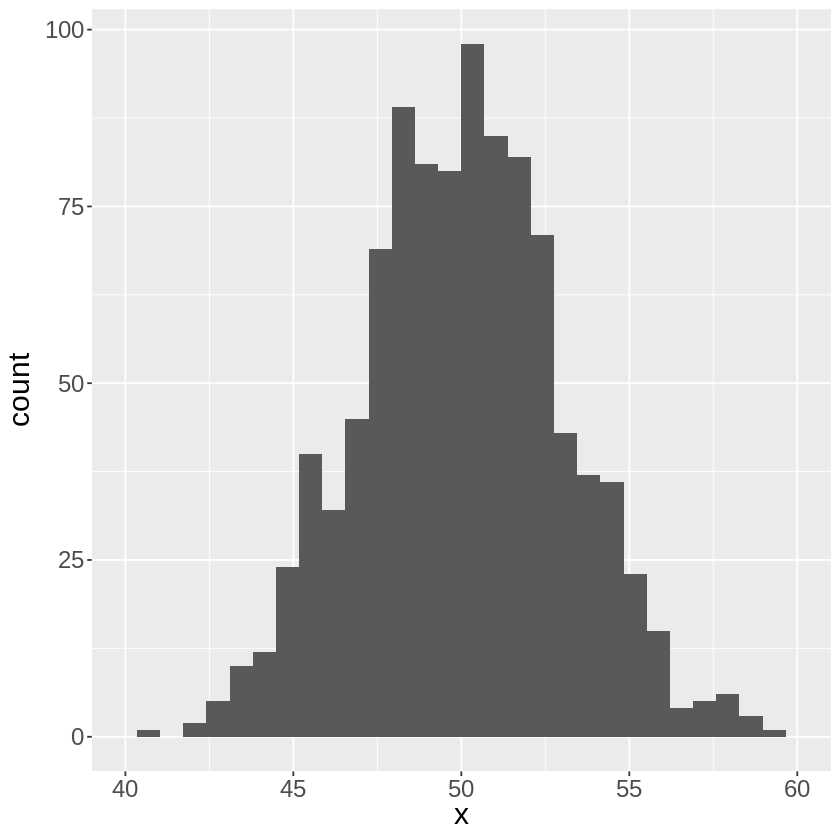

In [ ]:
# 試験の平均点の分布をみる

n = 10 # n人試験を受ける

mean_scores <- c()
for (i in 1:1000) {                  # 試験を1000回繰り返した場合のデータを作成
  scores <- rnorm(n, mean=50, sd=10) # 平均50分散10^2の正規分布から標本nサンプリング
  mean_scores <- c(mean_scores, c(mean(scores)))
}
mean_scores <- data.frame(x=mean_scores)

# 平均点のグラフ化
library(ggplot2)
g <- ggplot(mean_scores, aes(x = x))
g <- g + geom_histogram()
g <- g + xlim(40, 60)
g <- g + theme(text = element_text(size = 18))
g

という形で、$n$の増加に伴って分散が小さくなることが分かります。

<br>

$\bar{X}$の分布は$N(\mu, \sigma^2/n)$に従うことが分かったので、

例えば分散が$\sigma^2=5^2$である母集団において、平均値$\mu=170$だと仮定したとします。

そこで、10標本調査した結果、標本平均が$\bar{X} = 175$だったとすると、$\mu=170$という仮定がどのくらい正しいか考えてみます。

標本平均は$N(170, 5^2/10)$に従うので、この正規分布における$175$がどの位置かグラフで見てみると


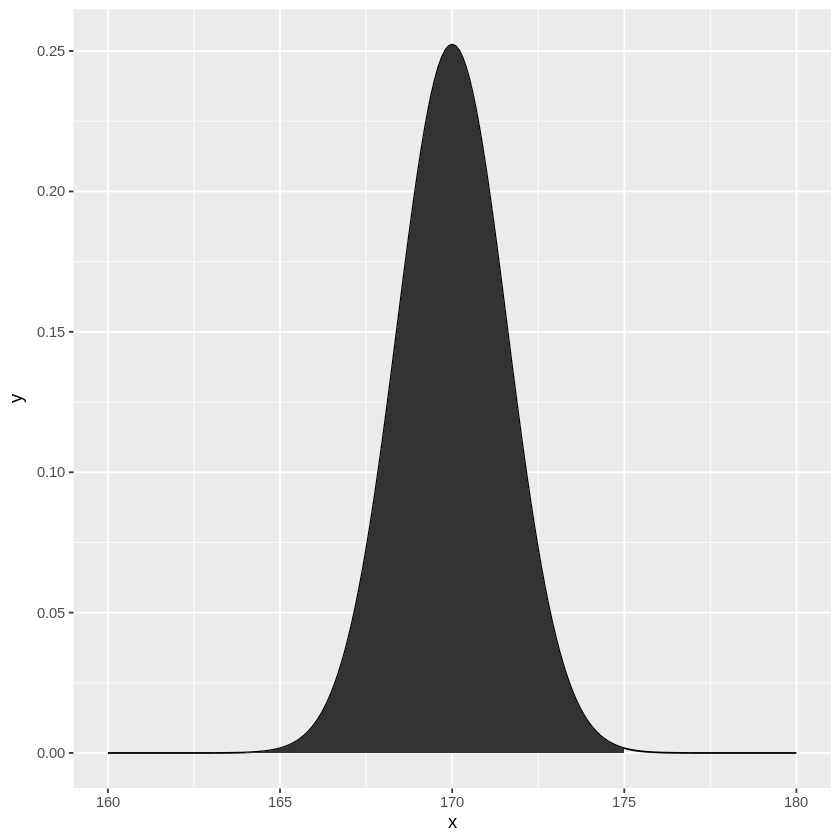

In [ ]:
# 175以下の領域を可視化
library(ggplot2)

x <- seq(160,180,0.1)
y <- dnorm(x, 170, sqrt(25/10))
data <- data.frame(x=x, y=y)

x_color <- seq(160,175,0.1)
y_color <- dnorm(x_color, 170, sqrt(25/10))
data_color <- data.frame(x=x_color, y=y_color)

g <- ggplot()
g <- g + geom_path(data=data, aes(x=x, y=y))
g <- g + geom_ribbon(data=data_color, aes(x=x, y=y, ymin=0, ymax=y))
g

また、`pnorm`関数で標本平均$\bar{X} \geqq 175$の確率を求めてみると

In [ ]:
# 標本平均が175以上になる確率を求める
1 - pnorm(175, mean=170, sd=sqrt(25/10))

[1] 0.0007827011

ということで、もし$\mu = 170$であったら、$\bar{X} = 175$となるのは非常に低い確率だと分かります。

よって、もともとの仮定であった$\mu = 170$がおかしかったのでは？ということが分かったりします。

### 標本分散の標本分布

次に標本分散がどの様な分布に従うかを見てみます。

標本分散は前回扱った通り、

$s^2=\dfrac{1}{n-1}\lbrace(X_1-\bar{X})^2+(X_2-\bar{X})^2+...+(X_n-\bar{X})^2\rbrace$

によって計算され、$E(s^2)=\sigma^2$と、期待値が母集団の母分散と一致する不偏性を持ちます。

### $\chi^2$分布

ここで、標本分散を扱う際に必ず関係してくる確率分布である$\chi^2$**分布**を紹介します。

標準正規分布$N(0,1)$に従う確率変数$Z_1, Z_2,...Z_k$があったとき、

$\chi^2 = Z_1^2+Z_2^2+...+Z_k^2$が従う確率分布を**自由度$k$の$\chi^2$分布**と呼びます。

自由度$k$の$\chi^2$分布は$\chi^2(k)$と表します。

$\chi^2$分布は自由度をパラメータとする分布で、正規分布に並び、分散の区間推定や適合度検定など、多くの統計的な問題に利用される分布になります。

$\chi^2$分布についてもＲで確率を計算を行うことができ、`dchisq`や`pchisq`関数などで計算できます。

`dchisq`関数で$\chi^2$分布の確率密度の計算が出来ます。

```
dchisq(x, df=自由度)
```

$\chi^2$分布は自由度によって形が決まります。

下のコードで自由度に応じてどんな形状になるか確認することができます。

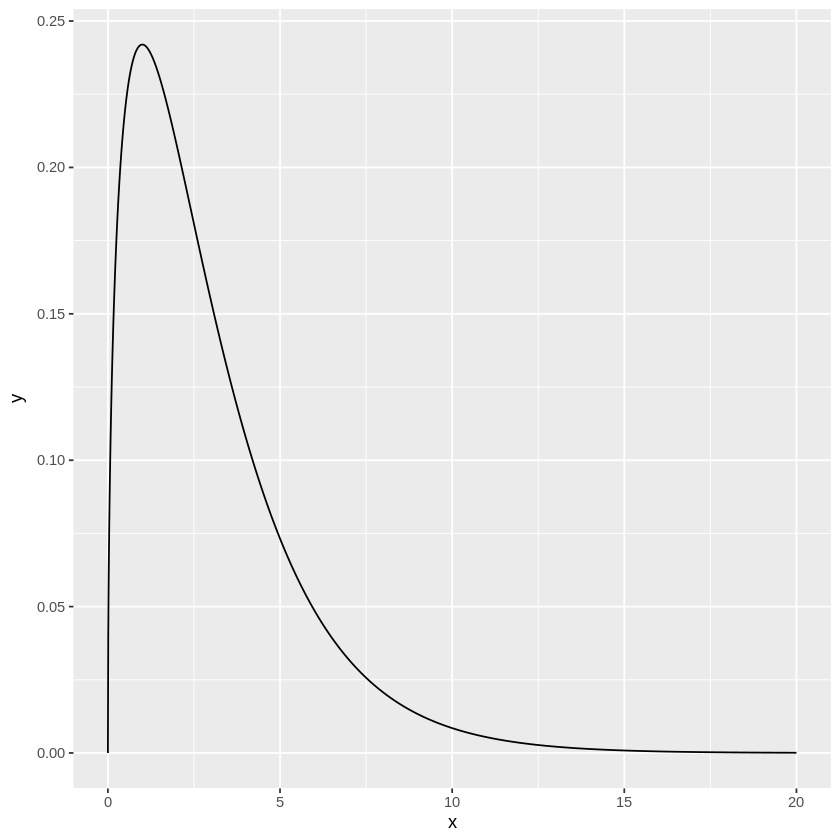

In [ ]:
# カイ2乗分布の描写

df <- 3 #自由度

library(ggplot2)
x <- seq(0,20,0.01)             # x = 0 ~ 10の範囲を描写
m <- dchisq(x, df=df)           # 自由度dfのカイ二乗分布
data <- data.frame(x=x,y=m)
g <- ggplot(data,aes(x=x, y=y))
g <- g + geom_line()
g

ここで、標本分散$s^2$について、

$s^2=\dfrac{1}{n-1}\lbrace(X_1-\bar{X})^2+(X_2-\bar{X})^2+...+(X_n-\bar{X})^2\rbrace$

とすると、

$(n-1)s^2/\sigma^2$は自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$に従う、

と$\chi^2$分布を用いて、標本分散$s^2$の標本分布を表す事が出来ます。

<br>

そのため、この$\chi^2$分布を用いることで、標本分散の変動具合などを考えることができます。

例えば、ある植物の草丈が母平均$\mu=50$ (cm)、母分散$\sigma^2=5^2$だとします。

この植物を10標本採集した際に、標本分散$s^2$が50を超える確率はどのくらいか考えてみます。

$s^2 > 50$となる確率$P(s^2 > 50)$は、先ほどの$\chi^2=(n-1)s^2/\sigma^2$に変形すると、

$P(s^2 > 50)$

$= P(\chi^2>(10-1)\times50/25)$

$=P(\chi^2>18) (自由度=9)$

となります。

自由度$n$の$\chi^2$分布で$\chi^2$値が$x$より大きくなる確率は`pchisq`関数を用いて計算します。

`pchisq`関数では$\chi^2$分布に従う確率変数がある値以下になる確率を計算することができるので、

```
pchisq(x, df=自由度)
```

$P(\chi^2>18) (自由度=9)$は

In [ ]:
# 自由度9のカイ二乗分布で、"18より大きくなる"確率を求める
1 - pchisq(18, df=9)

[1] 0.03517354

ということで、母分散$s^2=25$の2倍を超える様な分散が標本分散に現れる確率は、3.5%くらいだと考えられることが分かります。


#### 自由度の簡単な説明

$(n-1)s^2/\sigma^2$は自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$に従うということでしたが、

この理由を簡単に説明すると、

標本分散の式を変形すると、

$(n-1)s^2 = (X_1-\bar{X})^2+(X_2-\bar{X})^2+...+(X_n-\bar{X})^2$

となり、この式は、

$\dfrac{(n-1)s^2}{\sigma^2} = (\dfrac{X_1-\bar{X}}{\sigma})^2+(\dfrac{X_2-\bar{X}}{\sigma})^2+...+(\dfrac{X_n-\bar{X}}{\sigma})^2$

と形を整理することができます。

$\chi^2$分布の定義は、標準正規分布$N(0,1)$に従う確率変数$Z_1, Z_2,...Z_k$があったとき、

$\chi^2 = Z_1^2+Z_2^2+...+Z_k^2$が従う確率分布を**自由度$k$の$\chi^2$分布**と呼ぶ、ということでした。

$Z_i = \dfrac{X_i-\mu}{\sigma}$と$\dfrac{X_i-\bar{X}}{\sigma}$を比べると、$\mu$と$\bar{X}$以外同じ形です。

ただし、$\bar{X}$の場合、$X_1, X_2, ... X_{n-1}$まで値が決まれば、標本平均$\bar{X}$から最後の$X_n$の値が決まってしまうことになります。

言い換えると、**自由に動ける変数の個数**が$n-1$個ということで、自由度が$n-1$となります。



### 分散が未知の時の標本平均の標本分布

分散が既知の場合の標本平均$\bar{X}$の分布については先ほど考えました。

しかし、母分散$\sigma^2$が既知の場合というのはあまり現実的ではありません。

さきほど見た通り、標本平均$\bar{X}$の標本分布は正規分布$N(\mu, \sigma^2/n)$に従います。

標本平均$\bar{X}$を標準化した$Z=\dfrac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}$は標準正規分布$N(0,1)$に従いますが、

$\sigma^2$が分からないので計算できません。

そこで、母分散$\sigma^2$の代わりに標本分散$s^2$で代用した値を考えます。

$\sigma^2$を$s^2$で代用すると、$t=\dfrac{\bar{X}-\mu}{\sqrt{s^2/n}}$となります。

この値はスチューデントの**t統計量**と定義されます。

当然、式が変わってしまったのでこの値は$N(0,1)$には従いません。

そこで、$t$がどのような確率分布に従うか考えてみます。

$t$を式変形して、

$t=\dfrac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}/\sqrt{\dfrac{s^2}{\sigma^2}}$

とおき、

さらに分母を変形すると、

$t=\dfrac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}/\sqrt{\dfrac{(n-1)s^2}{\sigma^2}/(n-1)}$

となります。式中の、

$\dfrac{\bar{X}-\mu}{\sqrt{\sigma^2/n}}$は標準正規分布$N(0,1)$に従い、

$\dfrac{(n-1)s^2}{\sigma^2}$は自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$に従うので、

$t$は$N(0,1)$と$\chi^2(n-1)$が組み合わさって決まることが分かります。

この様な分布を**t分布**と呼びます。定義としては、

1. 確率変数$Z$が標準正規分布に従う。$Z \sim N(0,1)$
2. 確率変数$Y$が自由度$k$の$\chi^2$分布に従う。$Y \sim \chi^2(k)$
3. $Y$と$Z$は独立

この時、$t=\dfrac{Z}{\sqrt{Y/k}}$と定義される$t$が従う確率分布を**自由度$k$のt分布**と呼びます。この分布は$t(k)$で表します。

今回最初に扱った$t=\dfrac{\bar{X}-\mu}{\sqrt{s^2/n}}$は、自由度$n-1$の$t$分布$t(n-1)$に従うことになります。

$t$分布は分散が未知の場合に、標準正規分布の代用品として扱うことになりますが、自由度$k$が大きい場合は、標準正規分布とほとんど変わらなくなるという特徴を持っています。

$t$統計量は、平均値の比較を行うt検定や平均値の区間推定に用いられる重要な統計量なので、度々登場します。

当然ですが、$t$分布に関しても、Rで計算をすることが可能です。

`dt`や`pt`関数などで計算できます。

`dt`関数で$t$分布の確率密度の計算が出来ます。

```
dt(x, df=自由度)
```

$t$分布も自由度によって形が変わるので、

下のコードで自由度に応じて$t$分布がどんな形状になるかと、標準正規分布との類似性の確認することができます。


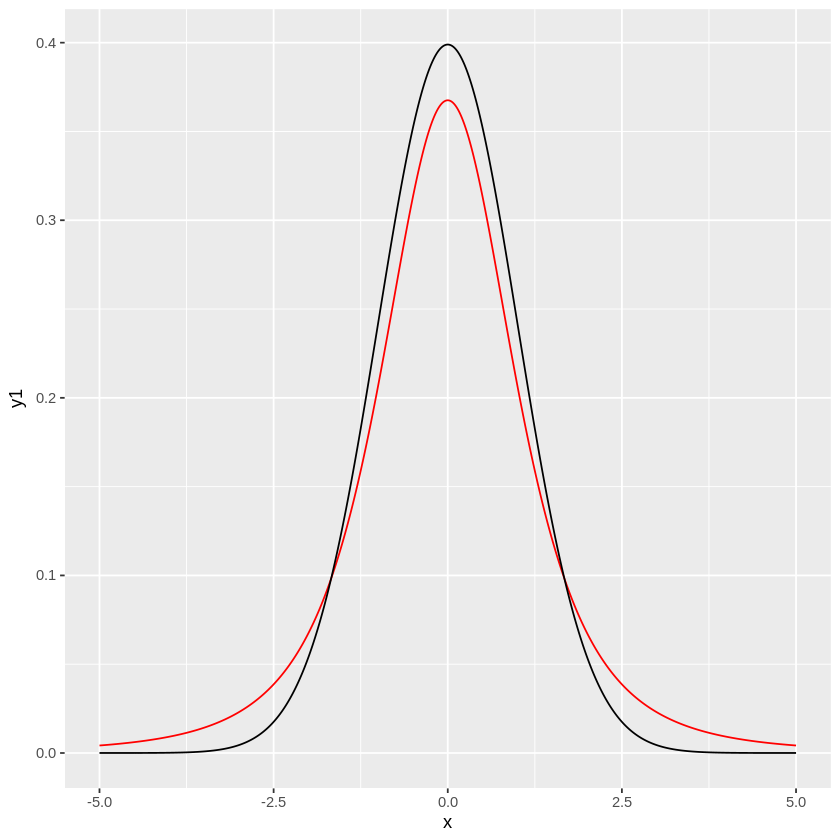

In [ ]:
# 自由度dfのt分布+標準正規分布のグラフを描写

df <- 3 #自由度

library(ggplot2)
x <- seq(-5,5,0.01)            # x = 0 ~ 10の範囲を描写
m1 <- dt(x, df=df)             # 自由度dfのt分布
m2 <- dnorm(x, mean=0, sd=1)   # 標準正規分布
data <- data.frame(x=x,y1=m1, y2=m2)
g <- ggplot(data)
g <- g + geom_line(aes(x=x, y=y1), colour="red")   # t分布を赤線で
g <- g + geom_line(aes(x=x, y=y2), colour="black") # 標準正規分布を黒線で
g

分散が既知であれば、先ほどの様に、$\mu=170$は妥当かどうか？の様な評価が出来ましたが、

分散が未知の場合は、この$t$統計量を用いて母平均の推定などを行います。

$t$統計量を用いた母平均の推定や検定はこの後扱っていきます。

## 推定

それではこれまでに得た知識を踏まえて、実際に母集団の特徴を調べる方法を学んでいきます。

**推定**とは、標本から得られたデータを基に、標本が抽出された母集団の分布の母数である、母平均や母分散などの値を求めることを指します。

例えば、多くの生物の特徴(草丈や種子数など)が正規分布$N(\mu, \sigma^2)$に従うことが分かっていても、その平均$\mu$や分散$\sigma^2$が分からなければ分布の形は分かりません。

また、珍しい現象がポアソン分布$Po(\lambda)$に従うことが多いと分かっていても、ポアソン分布は$\lambda$によって分布の形は大きく変わってしまうので、$\lambda$をなんとかして知る必要があります。

そして多くの場合、$\mu,\sigma^2,\lambda$といった母数は未知なので、これらを標本$X_1, X_2, ..., X_n$から定める必要があります。

これを母数の**推定**と言います。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/estimate.png?raw=true" alt="title" height="250px">

母数を推定するために標本から得られた統計量(標本平均など)を一般に**推定量**と呼び、

推定しようとするパラメータ$\theta$の推定量は`^`をつけて$\hat{\theta}$と表すことが多いです。

### 点推定と区間推定

推定は点推定と区間推定の2つに大きく分類されます。

台風の進路はその分かりやすい例になります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/typhoon.png?raw=true" alt="title" height="250px">

<small>https://newsdig.tbs.co.jp/articles/-/1357569より</small>

母平均$\mu$を標本平均$\bar{X}$で推定する場合の様に、母数$\theta$をある一つの値$\hat{\theta}$で指定する方法を**点推定**と呼びます。

点推定では、不偏推定量などの考え方が登場します。

また、標本$X_1, X_2, ..., X_n$は確率変数なので、標本から推定された$\hat{\theta}$は当然実際の$\theta$からは多少なりともズレる(誤差がある)ことになります。

そこで、どのくらい誤差があるかを推定量の標本分布をもとに考える必要があります。

この時用いられる**区間推定**は、一つの値を求めるのではなく、母数がある確率以上で含まれることが保証される区間を推定するもので、ある程度誤差を含んだ値の範囲を推定する手法になります。

例えば$P(A \leqq \mu \leqq B) \geqq 95\%$の様に、$\mu$が95%の確率で入ることが保証される区間がA~Bの範囲である、という形で区間を推定します。

### 点推定

点推定はこれまでにも何度か触れてきました。

例えば、標本平均$\bar{X}=(X_1+X_2+...+X_n)/n$は母平均$\mu$の推定量と考えられます。

この推定量を実際の観測値を基に計算した値を**推定値**と呼びます。

観測データが異なれば推定値も異なるので、推定値は推定量がとりうる値の一つが実現したものと考えられます。

実用上意味のある推定量は真の母数$\theta$付近にあることを示す基準を満たしていることが理想とされ、

この理想を満たす推定量かどうかという点に関するいくつかの指標があります。

**不偏性**と**一致性**はその代表的な指標になります。

**不偏性**

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/huhen.png?raw=true" alt="title" height="180px">

$\hat{\theta}$の分布は$\theta$の周辺に集まっている必要があり、その基準の一つが不偏性になります。

不偏性の定義としては、推定量の期待値が真の母数の値と一致する性質を指します。

$E(\hat{\theta})=\theta$

この性質を満たす推定量を**不偏推定量**と呼びます。

以前扱った通り、

標本平均$\bar{X}=(X_1+X_2+...+X_n)/n$や、

標本分散$s^2=\dfrac{1}{n-1}\lbrace(X_1-\bar{X})^2+(X_2-\bar{X})^2+...+(X_n-\bar{X})^2\rbrace$は、

$E(\bar{X}) = \mu$,    $E(s^2) = \sigma^2$となるので、いずれも不偏推定量と言えます。

**一致性**

一致性は、標本の大きさ$n$が大きくなるにつれ、推定量$\hat{\theta}$が真の母数の値$\theta$に近付いていく性質を指します。

この様な性質を持つ推定量を**一致推定量**と呼び、標本平均$\bar{X}$は母平均$\mu$の一致推定量、標本分散$s^2$は母分散$\sigma^2$の一致推定量となります。

標本平均は先ほど見た通り、一致性を示す推定量になります。



`stat_bin()` using `bins = 30`. Pick better value `binwidth`.
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


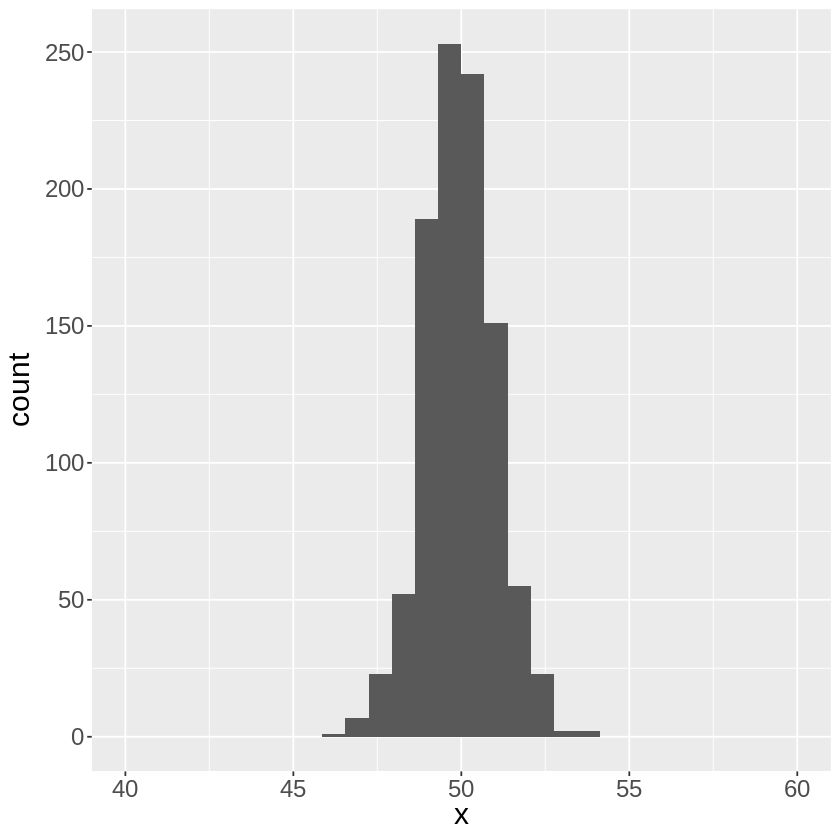

In [ ]:
# 試験の平均点の分布をみる

n = 100 # n人試験を受ける

mean_scores <- c()
for (i in 1:1000) {                  # 試験を1000回繰り返した場合のデータを作成
  scores <- rnorm(n, mean=50, sd=10) # 平均50分散10^2の正規分布から標本nサンプリング
  mean_scores <- c(mean_scores, c(mean(scores)))
}
mean_scores <- data.frame(x=mean_scores)

# 平均点のグラフ化
library(ggplot2)
g <- ggplot(mean_scores, aes(x = x))
g <- g + geom_histogram()
g <- g + xlim(40, 60)
g <- g + theme(text = element_text(size = 18))
g

不偏性と一致性は、推定量が最低限満たす必要のある性質になります。

今回はこの性質を満たす統計量として標本平均、標本分散を例として取り上げましたが、

性質を満たす推定量を求める方法として、モーメント法や最尤法などがあり、これらはまた後半の講義で扱う予定です。

### 区間推定

点推定では$\theta$をある一つの値として推定していましたが、

区間推定では$\theta$に対し、真の母数の値$\theta$がある区間$[L, U]$に入ることが保証される確率が$1-\alpha$以上になる、という考え方をします。

※真の母数の値$\theta$がある区間$[L, U]$に$1-\alpha$の確率で入る…とは違うのですが、この違いの説明は後程。

具体的には、$P(L \leqq \theta \leqq U) \geqq 1-\alpha$　となる確率変数$L, U$を求めます。

$L$は下限信頼限界、$U$は上限信頼限界、区間$[L, U]$を$100(1-\alpha)\%$**信頼区間**と呼びます。

$1-\alpha$としては、$95\%$信頼区間や$99\%$信頼区間がよく用いられます。




#### 母平均の区間推定

まずは母平均の区間推定を行っていきます。

##### 分散が既知の場合

母平均$\mu$、母分散$\sigma^2$の正規分布$N(\mu, \sigma^2)$に従う母集団から抽出した標本の標本平均$\bar{X}$は平均$\mu$、分散$\sigma^2/n$の正規分布に従いました。

$\bar{X} \sim N(\mu, \sigma^2/n)$

これを標準化すると、標準正規分布に従うようになります。

$Z=\dfrac{\sqrt{n}(\bar{X}-\mu)}{\sigma} \sim N(0,1)$

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/trust_norm.png?raw=true" alt="title" height="180px">

図のように、この$Z$は確率$1-\alpha$で区間$[-Z_{\alpha/2}, Z_{\alpha/2}]$に含まれる形になります。

つまり、

$P(-Z_{\alpha/2} \leqq \dfrac{\sqrt{n}(\bar{X}-\mu)}{\sigma} \leqq Z_{\alpha/2})=1-\alpha$

となる。この式を母平均$\mu$について解くと、

$P(\bar{X}-Z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}} \leqq \mu \leqq \bar{X}+Z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}})$

となる。よって、$\mu$の$100(1-\alpha)\%$信頼区間は、

$[\bar{X}-Z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}, \bar{X}+Z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}]$

と得られます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/trust_mu.png?raw=true" alt="title" height="200px">

Rの`qnorm`関数を使用することで、今回の$Z_{\alpha/2}$の様な標準正規分布において確率が$1-\alpha/2$となる位置にある$Z$値を計算できました。

```
qnorm(確率, mean=平均, sd=標準偏差)
```

$\alpha=0.05$の時の$Z_{\alpha/2}$や$-Z_{\alpha/2}$を求めてみると

In [ ]:
# α=0.05におけるZ_α/2を求める
qnorm(0.975, mean=0, sd=1)

[1] 1.959964

と、Rを使うことで$Z_{\alpha/2}$や$-Z_{\alpha/2}$を求める事が出来ます。

実際に信頼区間を計算をしてみます。

例えば、母分散$\sigma^2=9$の集団から20個体採集して得られた集団の値が、

99, 111, 92, 109, 92, 101, 108, 96, 84, 109, 99, 99, 111, 86, 96, 116, 115, 92, 85, 100

だったとします。この結果から、母平均の95%信頼区間を計算してみましょう。

信頼区間は下の式で計算できるので、先ほど得られた$Z_{\alpha/2}$や$-Z_{\alpha/2}$を使用して計算してみましょう。

$[\bar{X}-Z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}, \bar{X}+Z_{\alpha/2}\dfrac{\sigma}{\sqrt{n}}]$

In [ ]:
# 得られたデータの母平均の95%信頼区間を求める
data <- c(99, 111, 92, 109, 92, 101, 108, 96, 84, 109, 99, 99, 111, 86, 96, 116, 115, 92, 85, 100)
mean(data) - qnorm(0.975, mean=0, sd=1)*3/sqrt(20)
mean(data) + qnorm(0.975, mean=0, sd=1)*3/sqrt(20)

[1] 98.68522

[1] 101.3148

よって今回のデータから母平均の$95\%$信頼区間は$[98.68521..., 101.31478...]$と計算できました。

#### 信頼区間について

少しややこしいですが、この信頼区間の$95\%$の意味は、母平均が$95\%$の確率でこの範囲にある、ということではありません。

厳密には、$n=20$の標本抽出を100回繰り返すと、100回標本平均が計算され、その標本平均を基に100個の信頼区間が得られます。

この100個の信頼区間のうち、母平均$\mu$が含まれる区間が$95\%$ある、という意味を表しています。

##### 分散が未知の場合

さて、ここまでの説明では、母分散$\sigma^2$が既知のものとして計算を進めてきました。

$P(-Z_{\alpha/2} \leqq \dfrac{\sqrt{n}(\bar{X}-\mu)}{\sigma} \leqq Z_{\alpha/2})=1-\alpha$

しかし、現実には母分散$\sigma^2$が既知な状況というのはほとんどないので、上の式には$\sigma$が含まれているので計算できない値になります。

この場合は、標本分散$s^2$を代わりに用います。

先ほどの式の$\sigma$を$s$に置き換えると、

$P(-Z_{\alpha/2} \leqq \dfrac{\sqrt{n}(\bar{X}-\mu)}{s} \leqq Z_{\alpha/2})=1-\alpha$

となり、

この$\dfrac{\sqrt{n}(\bar{X}-\mu)}{s}$は標準正規分布$N(0,1)$には従わず、自由度$n-1$の$t$分布$t(n-1)$に従うので、

$t_{\alpha/2}$の様な、$t$分布において確率が$1-\alpha/2$となる位置にある$t$値を用いると、

$P(-t_{\alpha/2}(n-1) \leqq \dfrac{\sqrt{n}(\bar{X}-\mu)}{s} \leqq t_{\alpha/2}(n-1))=1-\alpha$

となる。

この式を母平均$\mu$について解くと、

$P(\bar{X}-t_{\alpha/2}(n-1)\times\dfrac{s}{\sqrt{n}} \leqq \mu \leqq \bar{X}+t_{\alpha/2}(n-1)\times\dfrac{s}{\sqrt{n}})$

となる。よって、$\mu$の$100(1-\alpha)\%$信頼区間は、

$[\bar{X}-t_{\alpha/2}(n-1)\times\dfrac{s}{\sqrt{n}}, \bar{X}+t_{\alpha/2}(n-1)\times\dfrac{s}{\sqrt{n}}]$

として得ることができます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/trust_t.png?raw=true" alt="title" height="180px">

こちらも先ほどと同じように、$t$分布において確率が$1-\alpha/2$となる位置にある$t$値はRで計算できます。

Rの`qt`関数を使用することで計算できました。

```
qt(確率, 自由度)
```

$\alpha=0.05$の時の自由度$19$の$t_{\alpha/2}$を求めてみると


In [ ]:
# α=0.05の時のt_α/2を求める
qt(0.975, 19)

[1] 2.093024

先ほどと同じデータから、分散が未知の場合の母平均の95%信頼区間を計算してみましょう。

$[\bar{X}-t_{\alpha/2}(n-1)\times\dfrac{s}{\sqrt{n}}, \bar{X}+t_{\alpha/2}(n-1)\times\dfrac{s}{\sqrt{n}}]$

In [ ]:
data <- c(99, 111, 92, 109, 92, 101, 108, 96, 84, 109, 99, 99, 111, 86, 96, 116, 115, 92, 85, 100)
mean(data) - qt(0.975, 19)*sd(data)/sqrt(20)
mean(data) + qt(0.975, 19)*sd(data)/sqrt(20)

[1] 95.37686

[1] 104.6231

よって今回のデータから母平均の$95\%$信頼区間は$[95.37685..., 104.62314...]$と計算できました。

#### 母分散の区間推定

次に、母分散の区間推定をしてみましょう。

正規分布$N(\mu, \sigma^2)$に従う母集団から得た標本サイズ$n$の標本から得られた標本分散$s^2$は、

少し前に学んだ通り、$(n-1)s^2/\sigma^2$が自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$に従うということを利用します。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/trust_chi.png?raw=true" alt="title" height="200px">

先ほどと同じように、上図の自由度$n-1$の$\chi^2$分布の上側$1-\alpha/2$点と下側$\alpha/2$点に挟まれた部分が$1-\alpha$となるので、

$(n-1)s^2/\sigma^2$は確率$1-\alpha$で区間$[\chi^2_{1-\alpha/2}(n-1), \chi^2_{\alpha/2}(n-1)]$に含まれる形になります。

つまり、

$P(\chi^2_{1-\alpha/2}(n-1) \leqq (n-1)s^2/\sigma^2 \leqq \chi^2_{\alpha/2}(n-1)) = 1-\alpha$

となります。

これを$\sigma^2$について解くと、

$P(\dfrac{(n-1)s^2}{\chi^2_{\alpha/2}(n-1)} \leqq \sigma^2 \leqq \dfrac{(n-1)s^2}{\chi^2_{1-\alpha/2}(n-1)}) = 1-\alpha$

となるので、母分散$\sigma^2$の$100(1-\alpha)\%$信頼区間は、

$[\dfrac{(n-1)s^2}{\chi^2_{\alpha/2}(n-1)}, \dfrac{(n-1)s^2}{\chi^2_{1-\alpha/2}(n-1)}]$

で計算できます。

$\chi^2$分布に関しても、上側$1-\alpha/2$点と下側$\alpha/2$点はRの`qchisq`関数で計算することができました。

```
qchisq(確率, 自由度)
```

$\alpha=0.05$の時の、自由度$19$の$\chi^2$分布における$\chi^2_{1-\alpha/2}$と$\chi^2_{\alpha/2}$を求めてみると


In [ ]:
# α=0.05, df=19の時の1-α/2点とα/2点を求める
qchisq(0.975, 19)
qchisq(0.025, 19)

[1] 32.85233

[1] 8.906516

得られた$\chi^2_{1-\alpha/2}$と$\chi^2_{\alpha/2}$を用いて、

先ほどとのデータから、母分散の$95\%$信頼区間を計算してみましょう。

$[\dfrac{(n-1)s^2}{\chi^2_{\alpha/2}(n-1)}, \dfrac{(n-1)s^2}{\chi^2_{1-\alpha/2}(n-1)}]$

In [ ]:
# 母分散の95%信頼区間を求める。
data <- c(99, 111, 92, 109, 92, 101, 108, 96, 84, 109, 99, 99, 111, 86, 96, 116, 115, 92, 85, 100)
(19 * sd(data)^2) / qchisq(0.975, 19)
(19 * sd(data)^2) / qchisq(0.025, 19)

[1] 56.43436

[1] 208.1622

よって、母分散の$95\%$信頼区間は、$[56.43435..., 208.16219]$と計算できました。

この様な形で、標本分布の情報から母平均や母分散の信頼区間を計算することができます。

## 検定

続いて、検定を扱います。

検定とは、母集団に対してある仮説をたて、その仮説の下で期待される結果と、実際に観測した結果の違いが、偶然によるものなのかどうかを、確率の基準で評価することになります。

まずは検定の考え方である「有意性検定」の考え方に触れ、その後、対立仮説という考えに基づく「仮説検定」を扱います。

### 有意性検定

検定の目的は、母集団についてたてられた仮説を、得られた標本に基づいて検証することにあります。

よく用いられる例としてメンデル遺伝のエンドウ豆のケースを考えてみましょう。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/mendel.png?raw=true" alt="title" height="300px">

黄色&丸い豆のエンドウ豆と緑色&しわのあるエンドウ豆を交配し、F2集団を作成すると、

各形質は理論上、$9:3:3:1$の割合で出現するというものです。

当然、実際にF2集団を作成しても、厳密に$9:3:3:1$になることは稀で、理論比から多少ずれた結果が得られることが予想されます。

ここで重要なのが、この「ずれ」が誤差の範囲内なのか、それ以上に意味のあるものなのか、という所です。

もし誤差として考え得る以上に大幅なズレ方をしていた場合、統計学では仮説からのずれは**有意**であると言います。

また、立てられた仮説($9:3:3:1$になるはず)を**統計的仮説**や単に**仮説**と呼びます。

つまり、今回学ぶ**仮説検定**では、統計的仮説の有意性を検定をすることになります。

<br>

有意性は標本が有意なずれを見せる確率で表されます。

ここで標本分布が重要になってきます。

例えば、あるコインを投げた時に表裏が出る確率は同じだ、と仮説を立て検証をしてみます。

実際にコインを20回投げてみると16回表が出ました。

この時「このコインは表裏が同じ確率で出る」という仮説はどの程度支持できるでしょうか？

**もし表裏が同じ確率で出るというのが正しければ**、コインが表になる回数$X$は二項分布$Bi(20, 1/2)$に従う確率変数です。

そこでコインの表が16回以上出る確率$P(X \geqq 16)$を、Rの二項分布の関数`pbinom`を使用して計算してみましょう。

```
# ex) 確率0.5の事象を20回試行したときに成功する回数がx回以下となる確率

pbinom(x, size=20, prob=0.5)
```

In [ ]:
# コインの表が16回以上出る確率を求める
1 - pbinom(15, size=20, prob=0.5)

[1] 0.005908966

$P(X \geqq 16) = 1 - 0.9941 = 0.0059$と、とんでもなく低い確率になります。

つまり、$X$が$16$回という観測データは仮説(表裏$50\%$)からすれば到底出現する可能性の低い、

かなりずれた(**=有意にずれた**)値ということになります。

つまり、そもそも仮説である表裏$50\%$が誤っている可能性が高い、と判断されることになります。

このことを**仮説は棄却された**、と言います。

ここで、$0.0059(0.59\%)$がとんでもなく低い確率と考えましたが、ではどのくらい低かったら**有意に低い**と判断して良いのでしょうか？

この基準とする確率を**有意水準**といい、有意水準$\alpha$と表すことが多いです。

有意水準$\alpha$は$0.05$や$0.01$が使用されることが多く、**仮説は有意水準$\alpha=0.01$のもとで棄却された**などと表現します。

例えば、先ほどの例で表の回数が$13$回だった時、同じように$P(X \geqq 13)$を計算してみると

In [ ]:
# コインの表が13回以上出る確率を求める
1 - pbinom(12, size=20, prob=0.5)

[1] 0.131588

$P(X \geqq 13) = 1 - 0.86841 = 0.13159$となるので、

有意水準$\alpha=0.05$のもとでは有意ではない(仮説の下で十分起こりうる)と判断されることになります。

この様に、仮説検定では、有意水準という基準を設け、観測値に基づいて得られた値がその基準を超えるときに仮説を棄却します。

このとき、下図のように、基準を超える部分は帰無仮説を棄却する範囲なので**棄却域**と呼びます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/reject1.png?raw=true" alt="title" height="180px">

### 帰無仮説と対立仮説

先ほどのコインの例だと、"コインの表裏が同じ確率で出る"という仮説は有意水準$\alpha=0.05$のもと棄却されました。

これは"コインの表裏は同じ確率では出ない"という別の仮説が**採択**された形になります。

このとき、元の仮説(表裏同じ確率)を**帰無仮説**、これと対立する仮説を**対立仮説**と呼び、それぞれ$H_0$、$H_1$と記します。

今回の場合だと

* 帰無仮説$H_0$: コインの表が出る確率$p = 0.5$
* 対立仮説$H_1$: コインの表が出る確率$p \ne 0.5$

となります。

### 過誤

実験で得られる標本はあくまで母集団の一部なので、検定を行った結果が毎回100%正しいとは限りません。

仮説検定は、採択する仮説に対し、ある程度誤りの可能性を含んだ上で行われます。

この誤りを**過誤**といい、仮説検定では2種類の過誤が生じる可能性があります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/false_positive.png?raw=true" alt="title" height="250px">

本当は帰無仮説($H_0$)が正しいのに、対立仮説($H_1$)を採択してしまう過誤が**第一種の過誤**(Type I error, 偽陽性, False positive)で、

その確率は$\alpha$、つまり有意水準の割合で生じることになります。$\alpha$の確率で生じる稀な標本を観測してしまったがために、本当は正しい帰無仮説を棄却してしまう場合になります。

一方、本当は対立仮説($H_1$)が正しいのに、帰無仮説($H_0$)を採択してしまう過誤を**第二種の過誤**(Type II error, 偽陰性, False negative)と呼びます。

第一種の過誤は、例えば本当は「薬品処理の効果は無い」のに「薬品処理の効果がある」と結論付けてしまう過誤となります。この誤りを小さくするためには有意水準$\alpha$を小さく設定することになります。

$\alpha$については5%や1%がよく用いられますが、場合によって0.1%や10%なども用いられ、明確な基準があるわけでは無いです。第一種の過誤が生じた場合の損害等に応じて決定します。

ただし、有意水準を厳しくするほど、第二種の過誤である、効果があるのに無いと判断される可能性が高くなります。

そのため、例えば毒性試験など、出来るだけ効果を逃したくない場合は第二種の過誤を小さくすることが求められます。

### 帰無仮説の採択について

有意性検定は、仮説に基づく期待から、大幅なずれが出ていることを根拠に、仮説を否定(棄却)する手法となります。

つまり、**仮説を棄却すること**が中心の手法となる。

仮説が棄却されなかった場合に、**その仮説を証明しているわけでは無い**。

得られた標本の結果が仮説に「矛盾していない」というだけのことになる。

棄却されない = 仮説が正しい、では無い点は注意しておきましょう。

コインの例で言うと、仮にコインの裏表の確率が同じという仮説が棄却されなかった、というのは裏表が同じ確率であることを示したわけでは無く、極端にズレているわけでは無い、と言うだけの話になります。

### 両側検定と片側検定

ある２つのグループの差を考えます。

例えば島Aに生息するメヒシバの草丈と、島Bに生息するメヒシバの草丈を比較するとします。

この時、島Aの草丈と島Bの草丈の差$x$は正の場合も負の場合もあります。(Aの方が大きい場合or小さい場合)

島Aの草丈と島Bの草丈に差があるかないか、という検定の場合、この正負にかかわらず、0から遠いほど有意であると考える形になります。

この場合は下図の様に分布の両側に棄却域が存在している状況になり、**両側検定**と呼ばれています。

島Aの草丈と島Bの草丈の差$x$が有意かどうか検定する場合

* 島Aの草丈が極端に大きい場合
* 島Aの草丈が極端に小さい場合

の２種類あるというわけです。

一方、実験や調査の特性上、その正負まで含め検定したい場合があります。

島AとBの間に差があるか、ではなく、島Aの方が島Bの草丈より大きいかどうか、という検定の場合です。

このとき、棄却域は分布の右側にのみ存在し、**片側検定**と呼ばれています。

同じ有意水準$\alpha$でも、両側検定か片側検定かで厳しさが変わってきます。

片側検定は正負も検定の対象となる意味で両側検定より厳しく、

両側検定は有意と判断される値の大きさの点で片側検定より厳しいといえます。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/test_side.png?raw=true" alt="title" height="180px">

### 正規母集団に対する仮説検定

ここからは具体的に検定を実施する方法を見ていきます。

まずは、もっともよく使用されている検定として、母集団の分布が正規分布である場合の仮説検定を見ていきます。

#### 母平均に関する検定

最初に、母平均$\mu$、母分散$\sigma^2$の正規分布$N(\mu, \sigma^2)$に従う母集団において、母平均$\mu$に関する検定について見ていきます。

#### 両側検定

両側検定では、ある集団の観測値が得られたとき、その母集団の母平均が$\mu_0$なのかどうかを検定します。

帰無仮説、対立仮説は、

* $H_0:\mu=\mu_0$
* $H_1:\mu\ne\mu_0$

で与えられます。

この仮説の下、得られたデータから計算される標本平均$\bar{X}$が$\mu_0$からどれだけ離れている(差・ずれがある)かによって検定が行われます。

この差を判断する際に、分散$\sigma^2$が既知かどうかで検定方法が異なってきます。

<br>

**分散$\sigma^2$が既知の場合**

検定において仮説とのずれ・差の判断に用いる統計量を**検定統計量**と呼びます。

今回の検定統計量は、$\bar{X}$を標準化した値になります。

$\bar{X}$を標準化すると、

$Z=\dfrac{\bar{X}-\mu}{\sigma/\sqrt{n}}$

となり、この値は標準正規分布$N(0, 1)$に従う値になります。

ここで、帰無仮説$\mu=\mu_0$が正しければ、

$Z=\dfrac{\bar{X}-\mu_0}{\sigma/\sqrt{n}}$

となり、$Z$の値を計算する事が出来ます。

得られる$Z$の値を標準正規分布から得られるパーセント点$Z_{\alpha/2}$と比較して、

$|Z|>Z_{\alpha/2}$だと$H_0$を棄却することになり、$|Z|\leqq Z_{\alpha/2}$だと$H_0$は棄却されないことになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/reject2.png?raw=true" alt="title" height="180px">

<br>

**分散$\sigma^2$が未知の場合**

しかし実際に検定をする際には、$\sigma^2$が既知であることはほとんどなく、分散が未知の状況で検定を行う場合がほとんどです。

そこで、分散が未知の場合には、母分散$\sigma^2$を標本分散$s^2$で置き換えた$t$統計量

$t = \dfrac{\bar{X}-\mu}{s/\sqrt{n}}$

を検定統計量として用います。この$t$値は自由度$n-1$の$t$分布$t(n-1)$に従います。

帰無仮説$\mu=\mu_0$が正しければ、

$t = \dfrac{\bar{X}-\mu_0}{s/\sqrt{n}}$

となり、$t$値を計算できるので、

計算した$t$値が$t$分布から得られるパーセント点$t_{\alpha/2}(n-1)$と比較して、

$|t|>t_{\alpha/2}(n-1)$であれば$H_0$を棄却することになり、$|t|\leqq t_{\alpha/2}$であれば$H_0$は棄却されないことになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/reject3.png?raw=true" alt="title" height="180px">

この$t$統計量を用いた検定をスチューデントの$t$**検定**と呼びます。



**[例]**

A島において平均草丈が20cmとされている植物がいます。

C島に生息するこの植物の草丈も概ね20cmなのかどうか調べたい。

そこで、C島で10標本採集したところ、その草丈は23, 19, 26, 21, 25, 28, 22, 23, 27, 19であった。

C島に生息する個体もA島と同じように20㎝なのかどうか検定を試みる。

このとき、帰無仮説と対立仮説は

* $H_0:\mu=20$
* $H_1:\mu\ne 20$

と表せます。

そこでこの帰無仮説のもと$t$値を計算してみると、

$t = \dfrac{\bar{X}-\mu_0}{s/\sqrt{n}}$ で計算できるので



In [ ]:
# t値を求める
data <- c(23, 19, 26, 21, 25, 28, 22, 23, 27, 19)

(mean(data) - 20) / (sd(data) / sqrt(10))

[1] 3.298168

この$t$値が仮説の下でそこそこあり得る値なのか、それともほとんどあり得ない極端な値なのかを有意水準を基準に調べます。

例えば有意水準$5\%$で検定を行う場合は、自由度$20-1=19$の$t$分布における$t_{\alpha/2}$の値と得られた$t$値比較をします。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/t_test1.png?raw=true" alt="title" height="180px">

自由度$19$の$t分布$におけるパーセント点$t_{0.025}(19)$は、Rの$t$分布の関数`qt`で計算できます。

```
qt(累積確率, 自由度)
```


In [ ]:
# 自由度19のt分布におけるパーセント点を求める
qt(0.975, 19)

[1] 2.093024

よって、$t_{0.025}(19) < t$となるので、有意水準$\alpha=0.05$の下で、帰無仮説は棄却されることになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/p.png?raw=true" alt="title" height="180px">

また、帰無仮説が正しいと仮定したときに、観測されたデータ以上に極端な結果が得られる確率を**p値**と呼びます。

$p$値が小さいほど、偶然では説明できないような結果だと判断され、帰無仮説を棄却することに繋がります。

$p$値を`pt`関数で計算してみると

```
pt(t値, 自由度)
```

In [ ]:
# P値の計算
1 - pt(3.29816819303121, 19)

[1] 0.00189046

となり、$p$値が有意水準より小さいので帰無仮説は棄却される、と捉えることもできます。

#### 片側検定

片側検定では、ある集団の観測値が得られたとき、その母集団の母平均が$\mu_0$より大きいのかどうか、という検定で、

帰無仮説、対立仮説は、

* $H_0:\mu=\mu_0$
* $H_1:\mu > \mu_0$

で与えられます。

帰無仮説が両側検定の時と同じなので、検定統計量$t$は同じです。

ただし、対立仮説が異なるので、棄却域が異なることになります。

分散が未知の場合を例にすると、$t$統計量を計算し、

$t>t_{\alpha}(n-1)$であれば$H_0$を棄却することになり、$t\leqq t_{\alpha}(n-1)$であれば$H_0$は棄却されないことになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/reject4.png?raw=true" alt="title" height="180px">

[例]

さきほどの平均草丈が20cmとされている植物がいる。C島に生息するこの植物の草丈は20cm**より大きいのか**どうか調べたい。

C島で10標本採集したところ、その草丈は23, 19, 26, 21, 25, 28, 22, 23, 27, 19であった。

C島に生息する個体は20㎝より大きいのかどうか5%の有意水準で検定する。

この検定における帰無仮説と対立仮説は

* $H_0:μ=20$
* $H_1:μ>20$

と表せる。 先ほど計算した$t$値は$3.29816819303121$だったので、

パーセント点$t_{0.05}(19)$を見てみると、

In [ ]:
# 自由度19のt分布におけるα=0.05のパーセント点を求める
qt(0.95, 19)

[1] 1.729133

となり、有意水準5%で帰無仮説$H_0$は棄却された。

よって、C島に生息する植物の平均値は20㎝より高かったことが認められる。

#### 母分散に対する仮説検定

母集団の母分散に関しても、母分散$\sigma^2$がある値かどうか検定することが出来ます。

母分散の検定における帰無仮説・対立仮説は、

* 帰無仮説$H_0:\sigma^2=\sigma_0^2$
* 対立仮説$H_1:\sigma^2\ne\sigma_0^2$

となります。

このとき、検定統計量は標本分散$s^2$による

$\chi^2=(n-1)s^2/\sigma^2$

を用いることになります。

この検定統計量は自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$に従います。

帰無仮説のもとでは、$\chi^2=(n-1)s^2/\sigma_0^2$を計算する事が出来るので、

自由度$n-1$の$\chi^2$分布のパーセント点$\chi_{1-\alpha/2}^2(n-1)$および$\chi_{\alpha/2}^2(n-1)$を用いて、

両側検定の場合は$\chi_{1-\alpha/2}^2(n-1) < \chi^2 < \chi_{\alpha/2}^2(n-1)$のときに$H_0$を棄却せず、それ以外は棄却することになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/reject5.png?raw=true" alt="title" height="220px">

この検定を正規母集団の母分散についての$\chi^2$**検定**と呼びます。

今回のように分散そのものを検定する状況はあまりありませんが、$\chi^2$検定はばらつきについて検定する際によく用いられ、また後程何度か登場します。



#### 母平均の差の検定

母平均がある特定の値かどうか、という検定は実際あまり実施されませんが、

二つの正規母集団の母平均の差の検定は、非常によく用いられます。

例えば、施肥効果を調べるために、植物を2つのグループ(A, B)に分けます。Aグループには施肥を行い、もう片方のBグループには何もせず、2つのグループの間に差があるかを確認する場合に用いられます。

これを**2標本検定**といい、遺伝子をノックアウトした効果、実験である処理を行った効果...等々、生物学において適用例は多岐にわたります。

より一般化していくと、

2つの正規母集団がそれぞれ$N(\mu_1, \sigma_1^2), N(\mu_2, \sigma_2^2)$に従っていた時、

それぞれの集団から大きさ$m,n$の標本$X_1, X_2, ..., X_m, Y_1, Y_2, ..., Y_n$を抽出したとします。

これらの集団の母平均に差があるか検定する場合は、

帰無仮説$H_0:\mu_1 = \mu_2$

となり、対立仮説は

両側検定なら$H_1:\mu_1 \ne \mu_2$

片側検定なら$H_1:\mu_1 > \mu_2$または$H_1:\mu_1 < \mu_2$

となります。

この検定を実施する際に、使用する検定方法は2つの集団の母分散が等しいかどうかによって変わってきます。

##### **分散が等しい場合**

2つの母集団の分散が等しく、$\sigma_1^2=\sigma_2^2=\sigma^2$である場合、

標本平均$\bar{X}$と$\bar{Y}$の分布はそれぞれ$N(\mu_1, \sigma_1^2/m), N(\mu_2, \sigma_2^2/n)$に従います。

このとき標本平均の差$\bar{X} - \bar{Y}$の分布は、平均は差、分散は和になるので、

$N(\mu_1-\mu_2, (\sigma_1^2/m)+(\sigma_2^2/n))$となります。

分散が等しい$\sigma_1^2=\sigma_2^2=\sigma^2$とき、この平均値の差$\bar{X}-\bar{Y}$を標準化すると、

$Z = \dfrac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{(\dfrac{1}{m}+\dfrac{1}{n})\sigma^2}}$

となり、この$Z$は標準正規分布$N(0,1)$に従います。

しかし、$\sigma^2$が未知なので、各々の標本分散を合併した値に置き換える必要があります。

そこで、

$s^2 = \dfrac{\sum_{i=1}^{m}(X_i-\bar{X})^2+\sum_{j=1}^{n}(Y_j-\bar{Y})^2}{m+n-2}$

$=\dfrac{ (m-1)s_1^2+(n-1)s_2^2}{m+n-2}$

この様に合併した標本分散$s^2$を定義すると、

$(m+n-2)s^2/\sigma^2$は自由度$m+n-2$の$\chi^2$分布$\chi^2(m+n-2)$に従う値になります。

さきほどの$Z = \dfrac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{(\dfrac{1}{m}+\dfrac{1}{n})\sigma^2}}$の$\sigma^2$をこの$s^2$に置き換えると、

$t = \dfrac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{(\dfrac{1}{m}+\dfrac{1}{n})s^2}}$

となり、この$t$値は**2標本t統計量**と言い、自由度$m+n-2$の$t$分布$t(m+n-2)$に従います。

帰無仮説($\mu_1=\mu_2$)のもとではこの2標本t統計量は

$t = \dfrac{(\bar{X}-\bar{Y})}{\sqrt{(\dfrac{1}{m}+\dfrac{1}{n})s^2}}$

となり、

両側検定の場合$|t|>t_{\alpha/2}(m+n-2)$のとき帰無仮説を棄却することになり、それ以外の場合は棄却しないことになります。

片側検定の場合は$t>t_{\alpha}(m+n-2)$のとき(または$t<-t_{\alpha}(m+n-2)$のとき)帰無仮説を棄却することになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/reject6.png?raw=true" alt="title" height="220px">

**[例]**

ある植物に対し、施肥を行ったグループと行わなかったグループの草丈を比較する。各グループ10標本の測定結果が以下の様になった際に、各グループの分散が等しい時、これらのグループ間で草丈の平均値に差はあると言って良いだろうか？

施肥を行ったグループ: 13, 14, 12, 15, 13, 12, 15, 14, 16, 12

施肥無しのグループ: 12, 11, 13, 12, 14, 12, 13, 12, 15, 13

まず、このデータから$s^2$を計算し、その値を用いて$t$値を計算する。

$s^2 = \dfrac{ (m-1)s_1^2+(n-1)s_2^2}{m+n-2}$、
$t = \dfrac{(\bar{X}-\bar{Y})}{\sqrt{(\dfrac{1}{m}+\dfrac{1}{n})s^2}}$



In [ ]:
# GroupA, GroupBの平均値の差をt検定するため、t値を求める
GroupA <- c(13, 14, 12, 15, 13, 12, 15, 14, 16, 12)
GroupB <- c(12, 11, 13, 12, 14, 12, 13, 12, 15, 13)

s2 = (9*sd(GroupA)^2 + 9*sd(GroupB)^2) / (10+10-2)
(mean(GroupA) - mean(GroupB)) / sqrt((1/10+1/10)*s2)

[1] 1.546016

この$t$値に対し、$t$分布のパーセント点$t_{\alpha/2}(m+n-2)$を見ると

In [ ]:
# 自由度m+n-2のt分布のパーセント点を求める
qt(0.975, 18)

[1] 2.100922

ということで、$|t|>t_{\alpha/2}(m+n-2)$を満たさないので、棄却できない。

よって、有意水準5%のもとでGroupAとGroupBの平均値が同じという帰無仮説を棄却できなかったので、

施肥の効果は有意とは言えない、と評価できます。

##### **分散が異なる場合**

両集団の母分散が等しくない場合は複雑になります。

この場合、2つの母集団の分散$\sigma_1^2, \sigma_2^2$を推定して$\bar{X}-\bar{Y}$の分布を求める必要があります。

…が、どう頑張っても$\sigma_1^2, \sigma_2^2$無しには$\bar{X}-\bar{Y}$の正確な分布を求めることはできません。

そこで、近似的に分布を求める**ウェルチの近似法**を使用します。

これは、平均値の差$\bar{X}-\bar{Y}$を標準化した

$Z = \dfrac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{(\sigma_1^2/m)+(\sigma_2^2/n)}}$

に、各々の標本分散$s_1^2, s_2^2$を代入します。

$t= \dfrac{(\bar{X}-\bar{Y})-(\mu_1-\mu_2)}{\sqrt{(s_1^2/m)+(s_2^2/n)}}$

この$t$値が、近似的に自由度が

$v=\dfrac{(\dfrac{s_1^2}{m}+\dfrac{s_2^2}{n})^2}{\dfrac{(s_1^2/m)^2}{m-1}+\dfrac{(s_2^2/n)^2}{n-1}}$

に最も近い整数$v^{*}$の$t$分布$t(v^{*})$に従うという近似です。

ウェルチの近似法を用いると、両側検定の場合、$|t|>t_{\alpha/2}(v^*)$の時に、帰無仮説を棄却することになります。。

片側検定の場合、$t>t_{\alpha}(v^*)$(または$t<-t_{\alpha}(v^*)$)の時、帰無仮説を棄却することになります。

この検定は**ウェルチのt検定**と呼ばれます。

#### 母分散の比検定

2つの集団の母平均が等しいかどうかを検定する方法は分散が等しいかどうかで異なりました。

そこで、そもそも2つの集団の分散が等しい(比が1)かどうかを検定する必要があります。

この検定における帰無仮説と対立仮説は

帰無仮説としては$H_0: \sigma_1^2=\sigma_2^2$、

対立仮説としては$H_1: \sigma_1^2 \ne \sigma_2^2$

となります。

この帰無仮説は、$\sigma_1^2/\sigma_2^2=1$と置き換えて、標本分散に基づく$s_1^2/s_2^2$から評価していきます。

$s_1^2,s_2^2$はそれぞれ独立に$\chi^2$分布に従うので、$\chi^2$分布に従う確率変数の**比**がどんな確率分布に従うか知る必要がある。

ここで、$F$**分布**が登場します。$F$分布とは、

独立な確率変数$U, V$がそれぞれ

* $U$は自由度$k_1$の$\chi^2$分布$\chi^2(k_1)$に従う
* $V$は自由度$k_2$の$\chi^2$分布$\chi^2(k_2)$に従う

この$U, V$をそれぞれの自由度で割った後の比(**フィッシャーの分散比**と呼ぶ)を、

$F=\dfrac{U/k_1}{V/k_2}$

と定義すると、$F$の従う確率分布を**自由度($k_1, k_2$)の$F$分布**と呼び、$F(k_1, k_2)$と表します。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/F.png?raw=true" alt="title" height="220px">

独立である標本分散$s_1^2, s_2^2$それぞれの標本分布について考えてみると、

* $(m-1)s_1^2/\sigma_1^2$が自由度$m-1$の$\chi^2$分布$\chi^2(m-1)$に従う。
* $(n-1)s_2^2/\sigma_2^2$が自由度$n-1$の$\chi^2$分布$\chi^2(n-1)$に従う。

ということになります。

$F$分布の定義より、

$F=\dfrac{\dfrac{(m-1)s_1^2}{\sigma_1^2}/(m-1)}{\dfrac{(n-1)s_2^2}{\sigma_2^2}/(n-1)}=\dfrac{\sigma_2^2}{\sigma_1^2}\dfrac{s_1^2}{s_2^2}$

が自由度$(m-1, n-1)$の$F$分布$F(m-1, n-1)$に従うことになります。

これは帰無仮説($\sigma_1^2=\sigma_2^2$)において、**標本の分散比**

$F=s_1^2/s_2^2$となる。

つまり、分散比の検定では、

$F_{1-\alpha/2}(m-1, n-1) \leqq F \leqq F_{\alpha/2}(m-1, n-1)$

のときには帰無仮説は棄却されず、

$F < F_{1-\alpha/2}(m-1, n-1)$、または$F > F_{\alpha/2}(m-1, n-1)$

のときに帰無仮説を棄却することになります。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/reject7.png?raw=true" alt="title" height="220px">

この様な$F$統計量を検定統計量として用いる検定を$F$**検定**と呼びます。

**[例]**

先ほどのデータを用いて$F$検定を行ってみましょう。

施肥を行ったグループ: 13, 14, 12, 15, 13, 12, 15, 14, 16, 12

施肥無しのグループ: 12, 11, 13, 12, 14, 12, 13, 12, 15, 13

各グループの分散が等しいかどうか検定するには、

まず標本の分散比である$F$を計算します。

$F=s_1^2/s_2^2$

In [ ]:
# 標本の分散比を求める
GroupA <- c(13, 14, 12, 15, 13, 12, 15, 14, 16, 12)
GroupB <- c(12, 11, 13, 12, 14, 12, 13, 12, 15, 13)

sd(GroupA)^2 / sd(GroupB)^2

[1] 1.520661

次に、$F_{1-\alpha/2}(m-1, n-1), F_{\alpha/2}(m-1, n-1)$の値を求めます。

Rでは`qf`関数によって$F$分布のパーセント点を計算できます。

```
qf(0.975, 自由度1, 自由度2)
```

有意水準$\alpha=5\%$のもと、$F_{1-\alpha/2}(m-1, n-1), F_{\alpha/2}(m-1, n-1)$を求めてみると、


In [ ]:
# 自由度(9, 9)のF分布におけるパーセント点を求める
qf(0.975, 9, 9)
qf(0.025, 9, 9)

[1] 4.025994

[1] 0.2483859

ということで、$F_{1-\alpha/2}(m-1, n-1) \leqq F \leqq F_{\alpha/2}(m-1, n-1)$となり、

帰無仮説は棄却されない。

よってGroupAとGroupBの分散は有意水準$5\%$のもとで異なるとは言えない。という判断が出来ます。

#### **対応のある標本の平均値の比較**

これまで扱ってきた2集団の母平均を比較する場合の検定は、2つの集団がそれぞれ独立している、つまり**対応の無い**検定と言えます。

しかし、同じ標本に対して、処理を行った前後の比較をする場合、

例えば同じ植物個体に施肥する前後で草丈を比較するなど、

この様な場合は、施肥前の標本$X_1, X_2, ..., X_n$と施肥後の標本$Y_1, Y_2, ..., Y_n$が独立ではなく、

何らかの関係性を持っていることになります。($X_k$の個体の施肥後が$Y_k$)

この場合、施肥前と施肥後に差があるかを検定する際に、これまで扱っていた手法を適用することができません。

<br>

この検定では、施肥前後の**差の母平均**$\delta$について考える必要があります。

帰無仮説と対立仮説は、

* $H_0: \delta=0$
* $H_1: \delta\ne 0$

となります。

標本のペア$X_k$と$Y_k$の差を$X_k - Y_k = d_k$とおいて、

$d_k$の標本平均を$\bar{d}$、標本分散を$s_d^2$とすると、検定統計量は

$t=\dfrac{\bar{d}}{\sqrt{s_d^2/n}}$

で定義されます。これが自由度$n-1$の$t$分布$t(n-1)$に従うので、

両側検定の場合$|t|>t_{\alpha/2}(n-1)$であれば帰無仮説が棄却されます。

**対応のない$t$検定**との一番の違いとして、自由度が異なることになります。


#### Rによるt検定

ここまで、様々な状況下における$t$検定について扱い、いくつか式に沿って計算を行ってきましたが、

これらの計算はすべてRの`t.test`関数によって実施することができます。

例えば対応がない2集団で分散が等しい場合の$t$検定を両側検定で実施するには

```
t.test(x=集団1のデータ,y=集団2のデータ,alternative="t",var.equal=T,paired=F)
```
の様な形で実行できます。

先ほどの草丈のサンプルデータを用いて$t$検定をやってみると

施肥を行ったグループ: 13, 14, 12, 15, 13, 12, 15, 14, 16, 12

施肥無しのグループ: 12, 11, 13, 12, 14, 12, 13, 12, 15, 13

In [ ]:
# t.test関数を使用し、対応が無く分散が等しい場合のt検定を両側検定で実施する
GroupA <- c(13, 14, 12, 15, 13, 12, 15, 14, 16, 12)
GroupB <- c(12, 11, 13, 12, 14, 12, 13, 12, 15, 13)
t.test(x=GroupA,y=GroupB,alternative="t",var.equal=T,paired=F)


	Two Sample t-test

data:  GroupA and GroupB
t = 1.546, df = 18, p-value = 0.1395
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3230342  2.1230342
sample estimates:
mean of x mean of y 
     13.6      12.7 


`t = XXX`という部分に統計量$t$値があり、`df = XXX`は自由度、

`p-value = XXX`はこの$t$値よりも極端な値をとる確率($p$値)を示しています。

この$p$値をもとに、有意水準と比較して有意かどうか判断します。

`t.test`関数がある程度使えるようになれば、

毎回$t$値を計算する式を書いたり、$t$分布のパーセント点を見たりする必要も無くなるので、必要に応じて習得してみてください。



### 様々な$\chi^2$検定

$\chi^2$分布は標本分散が従う分布であり、ばらつきについての検定によく用いられます。

そのため、母分散に関する検定だけではなく、様々な検定に応用されています。

その代表例として、今回は適合度検定と独立性検定を紹介します。

#### 適合度検定

仮定された理論上の確率に対して、標本で得られた観察結果が適合しているか否かを検証する検定として、**適合度の$\chi^2$検定**があります。

例として、序盤に出てきたメンデルの法則に則るエンドウ豆のケースを考えてみましょう。

<img src="https://github.com/slt666666/biostatistics_text_wed/blob/main/source/_static/images/chapter6/mendel.png?raw=true" alt="title" height="300px">

黄色&丸い豆のエンドウ豆と緑色&しわのあるエンドウ豆を交配し、F2集団を作成すると、

各形質は理論上、$9:3:3:1$の割合で出現すると考えられます。

そこで、実際にF2集団を作成して観察値が得られたときに、各形質の度数が理論的な割合と合致しているかを調べます。

例えば556個体の標本を得て、下記の様なデータが得られたとします。

\begin{array}{lrr} \hline
   表現型 & 黄・丸 & 黄・しわ & 緑・丸 & 緑・しわ & 計 \\ \hline
   観測度数 & 315 & 101 & 108 & 32 & 556 \\
   確率 & 9/16 & 3/16 & 3/16 & 1/16 & 1 \\
   理論度数 & 312.75 & 104.25 & 104.25 & 34.75 & 556 \\ \hline
   度数の差 & 2.25 & -3.25 & 3.75 & -2.75 & 0 \\ \hline
\end{array}

こうしてみると、凡そ理論上の数値と近い観察結果が得られていることが分かります。

この差が有意なのかどうかを調べる方法として、ピアソンの**適合度基準**を使用します。

<br>

\begin{array}{lrr} \hline
   属性カテゴリー & A_1 & A_2 & ... & A_k & 計 \\ \hline
   観測度数 & f_1 & f_2 & ... & f_k & n \\
   確率 & p_1 & p_2 & ... & p_k & 1 \\
   理論度数 & np_1 & np_2 & ... & np_k & n \\ \hline
\end{array}

適合度基準とは、

ある属性によって$n$個の個体が$k$種類のカテゴリー($A_1, A_2, ..., A_k$)に分類されるとき、

標本から得られた各カテゴリー毎の度数を**観測度数**($f_1, f_2, ..., f_k$)とします。

この観測度数が理論確率$p_1, p_2, ..., p_k$に適合するかを見るためには、

理論確率通りに観察された場合の**理論度数(または期待度数)**$(np_1, np_2, ..., np_k$)と観測度数と比べる必要があります。

ここで、適合度基準は

$\chi^2=\sum_{i=1}^{k}\dfrac{(f_i-np_i)^2}{np_i}$

と定義されます。

この適合度の$\chi^2$統計量は$n$が大きいとき、自由度$k-1$の$\chi^2$分布$\chi^2(k-1)$に従うことが知られています。

得られた観察結果が理論値と近ければ$\chi^2$は小さい値となるので、適合度検定ではその大小を$\chi^2$分布から調べる形になります。

帰無仮説を

$H_0:P(A_1)=p_1, P(A_2)=p_2..., P(A_k)=p_k$とすると、

$\chi^2 > \chi_{\alpha}^2(k-1)$であれば、帰無仮説(観測度数は理論上の値と適合している)は棄却されることになります。

<br>

メンデルの例で計算してみると、

\begin{array}{lrr} \hline
   表現型 & 黄・丸 & 黄・しわ & 緑・丸 & 緑・しわ & 計 \\ \hline
   観測度数 & 315 & 101 & 108 & 32 & 556 \\
   確率 & 9/16 & 3/16 & 3/16 & 1/16 & 1 \\
   理論度数 & 312.75 & 104.25 & 104.25 & 34.75 & 556 \\ \hline
   度数の差 & 2.25 & -3.25 & 3.75 & -2.75 & 0 \\ \hline
\end{array}

$\chi^2 = \dfrac{(2.25)^2}{312.75}+\dfrac{(-3.25)^2}{104.25}+\dfrac{(3.75)^2}{104.25}+\dfrac{(-2.75)^2}{34.75}$

$=0.470$

自由度$4-1=3$の$\chi^2$分布のパーセント点$\chi_{0.05}^2(3)$をRの`qchisq`関数で見てみると

```
qchisq(パーセント, 自由度)
```

In [ ]:
# 自由度3のカイ二乗分布におけるα=0.05のパーセント点を求める
qchisq(0.95, 3)

[1] 7.814728

ということで、$\chi^2 > \chi_{\alpha}^2(k-1)$ではないので、帰無仮説は棄却されない。

つまり、理論上の度数と大きく矛盾はしていないことになります。

適合度の検定はしばしば

$\chi^2=\sum(O-E)^2/E$

と表されます。$O$はObservedで観測度数を表し、$E$はExpectedで期待度数を表します。

#### 独立性検定

$\chi^2$検定はあるデータの持つ2つの属性の独立性を調べることもできます。

$n$個の標本について、2つの属性$A, B$を測定したとします。

例えば属性$A$が葉の色という属性、属性$B$が病気にかかりやすいかどうか、という属性を測定した場合

下の様な、記述統計学の際にも触れた分割表を得ることができます。

\begin{array}{c|ccc|c}  \hline
  属性 & 病気に強い & 中くらい & 病気に弱い &　計\\ \hline \hline
  葉の色・緑 & 4 & 2 & 3 & 9 \\
  葉の色・黄 & 8 & 4 & 6 & 18 \\
  葉の色・茶 & 6 & 3 & 6 & 15 \\ \hline
  計 & 18 & 9 & 15 & 42 \\ \hline
\end{array}

この分割表において**独立**というのがどういう意味かというと、

病気の強さと葉の色には関連が無い、ということを指します。

一般化すると、下の様な一般的な分割表において

\begin{array}{c|cccc|c}  \hline
  属性 & B_1 & B_2 & ... & B_c & 計\\ \hline \hline
  A_1 & f_{11} & f_{12} & ... & f_{1c} & \sum\limits_{j}f_{1j} \\
  A_2 & f_{21} & f_{22} & ... & f_{2c} & \sum\limits_{j}f_{2j}\\
  ... & ... & ... & ... & ... & ... \\
  A_r & f_{r1} & f_{r2} & ... & f_{rc} & \sum\limits_{j}f_{rj}\\ \hline
  計 & \sum\limits_{i}f_{i1} & \sum\limits_{i}f_{i2} & ... & \sum\limits_{i}f_{ic} & n \\ \hline
\end{array}

帰無仮説$H_0:すべてのi, jに対し、
P(A_i\cap B_j)=P(A_i)P(B_j)$

であることを指します。

つまり、$A_1, A_2, ..., A_r$になる確率はどの$B$に対しても変わらないことを意味します。

当然、$B_1, B_2, ..., B_c$になる確率はどの$A$に対しても変わらないことも意味します。

<br>

この独立性を検定するには、

まず、$P(A_i)=p_{i\cdot}, P(B_j)=p_{\cdot j}$とすると、相対度数から$p_{i\cdot},p_{\cdot j}$を推定し

$\hat{p_{i\cdot}}=f_{i\cdot}/n$　　$\hat{p_{\cdot j}}=f_{\cdot j}/n$

と計算することができます。

帰無仮説$H_0$が成立している場合、$A_i$かつ$B_j$の属性の理論度数(期待度数)は、

$E_{ij} = n\hat{p_{i\cdot}}\hat{p_{\cdot j}}=f_{i\cdot}f_{\cdot j}/n$

と計算できます。

\begin{array}{c|ccc|c}  \hline
  属性 & B_1 & ... & B_c & 確率\\ \hline \hline
  A_1 & E_{11}=n\hat{p_{1\cdot}}\hat{p_{\cdot 1}} & ... & E_{1c}=n\hat{p_{1\cdot}}\hat{p_{\cdot c}} & \hat{p_{1\cdot}} = \sum\limits_{j}f_{1j}/n \\
  ... & ... & ... & ... & ... \\
  A_r & E_{r1}=n\hat{p_{r\cdot}}\hat{p_{\cdot 1}} & ... & E_{rc}=n\hat{p_{r\cdot}}\hat{p_{\cdot c}} & \hat{p_{r\cdot}} = \sum\limits_{j}f_{rj}/n \\ \hline
  確率 & \hat{p_{\cdot 1}} = \sum\limits_{i}f_{i1}/n & ... & \hat{p_{\cdot c}} = \sum\limits_{i}f_{ic}/n &  \\ \hline
\end{array}

ここで、適合度の検定(独立している状況に適合しているか)を用いることで、

**独立性の$\chi^2$検定**を行うことができます。

この時統計量は

$\chi^2=\sum\limits_{i}\sum\limits_{j}\dfrac{(f_{ij}-f_{i\cdot}f_{\cdot j}/n)^2}{f_{i\cdot}f_{\cdot j}/n}$

$=\sum\limits_{i}\sum\limits_{j}\dfrac{(nf_{ij}-f_{i\cdot}f_{\cdot j})^2}{nf_{i\cdot}f_{\cdot j}}$

として計算されます。

この$\chi^2$が従う$\chi^2$分布の自由度は、$(r-1)(c-1)$となります。

<br>

葉の色・病気の分割表の例でみてみると、

\begin{array}{c|ccc|c}  \hline
  期待度数 & 病気に強い & 中くらい & 病気に弱い & 確率 \\ \hline \hline
  葉の色・緑 & 9\times18/42 & 9\times9/42 & 9\times15/42 & 9/42 \\
  葉の色・黄 & 18\times18/42 & 18\times9/42 & 18\times15/42 & 18/42 \\
  葉の色・茶 & 15\times18/42 & 15\times9/42 & 15\times15/42 & 15/42 \\ \hline
  確率 & 18/42 & 9/42 & 15/42 & n=42 \\ \hline
\end{array}

$\chi^2=\dfrac{(4-9\cdot18/42)^2}{9\cdot18/42}+\dfrac{(2-9\cdot9/42)^2}{9\cdot9/42}+...+\dfrac{(6-15\cdot15/42)^2}{15\cdot15/42}=0.19$

自由度は$(3-1)(3-1)=4$なので、$\chi^2(4)$のパーセント点を`qchisq`関数で求めると、

```
qchisq(確率, 自由度)
```

In [ ]:
# 自由度4のカイ2乗分布のパーセント点を求める
qchisq(0.95, 4)

[1] 9.487729

となり、有意水準5%で葉の色と病気のなりやすさの独立性の仮説は棄却されず、

両者に関係があるとはいえない、と評価される。

#### Rによる$\chi^2$検定

適合度検定や独立性検定はRの`chisq.test`という関数を使用する事でも実施できます。

例えば、先ほどの黄丸・黄しわ・緑丸・緑しわの観測値が$315, 101, 108, 32$であったとき、

これが$9:3:3:1$に適合しているかを検定する場合は

```
chisq.test(x=観測値,p=各観測値の確率)
```

という形で実施できます。

In [ ]:
# 適合度検定をchisq.testで実施する
chisq.test(x=c(315, 101, 108, 32), p=c(9/16, 3/16, 3/16, 1/16))

と、$\chi^2$値と$p$値が求まるので、検定を実施できます。

また、独立性の検定の場合は`matrix`関数でデータの行列を作成し、`chisq.test`関数に与えます。

```
chisq.test(matrixデータ)
```

In [ ]:
# 独立性の検定をchisq.testで実施する
x <- matrix(c(4, 2, 3, 8, 4, 6, 6, 3, 6),nrow=3,byrow=T)
chisq.test(x)

Warning message in chisq.test(x):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  x
X-squared = 0.18667, df = 4, p-value = 0.9959


こちらも同様に、$\chi^2$値と$p$値が求まるので、検定を実施できます。
